In [1]:
docs = ['바나나 사과 포도 포도',
       '사과 포도',
       '포도 바나나',
       '짜장면 짬뽕 탕수육',
       '볶음밥 탕수육',
       '짜장면 짬뽕',
       '된장찌개 김치찌개 김치 비빔밥',
       '김치 된장 비빔밥',
       '비빔밥 김치',
       '사과 볶음밥 김치 된장']

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
n_topic=3

# TF_IDF 선언
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(docs)

# SVD선언
svd = TruncatedSVD(n_components=n_topic)
u_sigma = svd.fit_transform(tfidf)
svd.components_

array([[ 0.39094311,  0.08663945,  0.2634605 ,  0.08663945,  0.31533599,
         0.1677167 ,  0.33012626,  0.42118555,  0.01907605,  0.01907605,
         0.05422822,  0.58747296],
       [ 0.49683512,  0.13720069,  0.26962551,  0.13720069, -0.29774469,
         0.10773075,  0.49275818, -0.18567019,  0.02131272,  0.02131272,
         0.04450862, -0.51222803],
       [-0.06285924, -0.02901254, -0.00762375, -0.02901254, -0.01957621,
         0.19210545, -0.09004258,  0.00851823,  0.60658392,  0.60658392,
         0.46061907, -0.02794911]])

In [12]:
vocab = tfidf_vect.get_feature_names()
print(vocab)

n = 3
for idx, topic in enumerate(svd.components_):
    print("Topic %d:" % (idx),[(vocab(i), topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])

['김치', '김치찌개', '된장', '된장찌개', '바나나', '볶음밥', '비빔밥', '사과', '짜장면', '짬뽕', '탕수육', '포도']


TypeError: 'list' object is not callable

## 단어벡터간의 상관관계

In [6]:
#단어벡터
for i in range(len(vocab)):
    print("{} : {}".format(vocab[i], svd.components_.T[i]))

김치 : [ 0.39094311  0.49683512 -0.06285924]
김치찌개 : [ 0.08663945  0.13720069 -0.02901254]
된장 : [ 0.2634605   0.26962551 -0.00762375]
된장찌개 : [ 0.08663945  0.13720069 -0.02901254]
바나나 : [ 0.31533599 -0.29774469 -0.01957621]
볶음밥 : [0.1677167  0.10773075 0.19210545]
비빔밥 : [ 0.33012626  0.49275818 -0.09004258]
사과 : [ 0.42118555 -0.18567019  0.00851823]
짜장면 : [0.01907605 0.02131272 0.60658392]
짬뽕 : [0.01907605 0.02131272 0.60658392]
탕수육 : [0.05422822 0.04450862 0.46061907]
포도 : [ 0.58747296 -0.51222803 -0.02794911]


In [13]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

# 코사인 유사도
def cosine_similarity(a, b):
    return dot(a, b)/(norm(a)*norm(b))

# 코사인 유사도를 사용해서 행렬의 유사도 구하기
def calc_similarity_matrix(vectors):
    n_word = len(vectors)
    similarity_matrix = np.zeros((n_word, n_word))
    
    for i in range(n_word):
        # 위에서 정의한 코사인 유사도 사용
        for j in range(i, n_word):
            similarity_matrix[j, i] = cosine_similarity(vectors[i], vectors[j]).round(4)
            
    return similarity_matrix

In [24]:
word_vectors = svd.components_.T
word_similarity_matrix=calc_similarity_matrix(word_vectors)
word_similarity_matrix

array([[ 1.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.9917,  1.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.9912,  0.966 ,  1.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.9917,  1.    ,  0.966 ,  1.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [-0.0849, -0.1811,  0.018 , -0.1811,  1.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.6085,  0.5202,  0.6876,  0.5202,  0.1419,  1.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.9958,  0.9993,  0.9749,  0.9993, -0.1569,  0.5489,  1.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.2457,  0.1419,  0.3505,  0.1419,  0.9403,  0.4102,  0.1694,
         1.    ,  0.    ,  0.    ,  0.    ,  0.    ],


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_similarity(similarity_matrix):
    uniform_data = similarity_matrix
    mask = np.triu(np.ones_like(similarity_matrix, dtype=np.bool))
    plt.rcParams['figure.figsize']=[8,6]
    ax = sns.heatmap(uniform_data, mask=mask, annot=True, fmt='.2f', annot_kws={'size':8},
                     cmap='coolwarm')

In [29]:
print(vocab)

['김치', '김치찌개', '된장', '된장찌개', '바나나', '볶음밥', '비빔밥', '사과', '짜장면', '짬뽕', '탕수육', '포도']


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


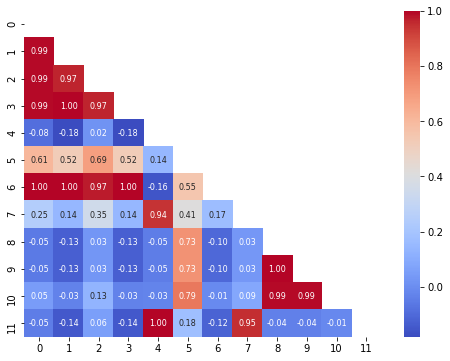

In [30]:
visualize_similarity(word_similarity_matrix)

## 단어벡터 시각화

In [31]:
%matplotlib inline
import matplotlib.font_manager as fm
import matplotlib

fontprop = fm.FontProperties(fname='C:/Users/671/AppData/Local/Microsoft/Windows/Fonts/NanumBarunGothic.ttf', size=12)

In [36]:
from sklearn.manifold import TSNE
import numpy as np
vectors = word_vectors
labels = tfidf_vect.get_feature_names()
def visualize_vectors(vectors, labels):
    tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
    np.set_printoptions(suppress=True)
    T = tsne.fit_transform(vectors)
    
    plt.figure(figsize=(10,6))
    plt.scatter(T[:,0], T[:,1], c='orange', edgecolors='r')
    for label, x, y in zip(labels, T[:,0], T[:,1]):
        plt.annotate(label, xy=(x+1, y+1), xytext=(0,0),
                    textcoords='offset points',
                    fontproperties=fontprop)

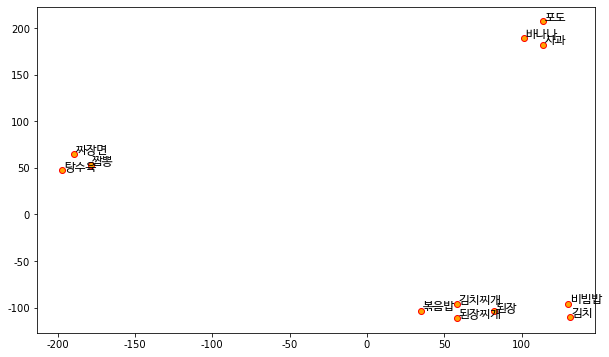

In [37]:
visualize_vectors(vectors, labels)